# Hansard Analysis

This notebook contains code to analyse Hansard, the official record of every spoken or written contribution made in the Houses of Parliament from 1803 to the present day.

*Contains Parliamentary information licensed under the Open Parliament Licence v3.0.*

## Why bother?

Looking at changes in political discourse over time is fascinating. We can infer a lot about which issues were prioritised by different governments, how Members of Parliament responded to global events, when emerging technologies were first mentioned in Parliament, and how the tone surrounding different issues has changed.

![Hansard](https://assets3.parliament.uk/iv/main-large//ImageVault/Images/id_10860/scope_0/ImageVaultHandler.aspx.jpg)


## Downloading the archives

The online Hansard archive (available at https://hansard.parliament.uk/) is an incredibly rich source of information, and is free to access. It's also a bit of a mess; this means it's more efficient to download a local copy of Hansard and search that, so we'll start off by writing some code to automatically download one HTML file for every day's worth of Parliamentary debate.

Downloading all this will take a good couple of days even with the code running continuously, but on the plus side your non-technical friends will think you're orders of magnitude more intelligent than you actually are if you intersperse every conversation with "sorry, I just need to go and check my code is still running." For bonus points, switch the colour scheme on your terminal to green on black and be sure to accidentally on purpose give them a glimpse of the output.

In [10]:
# Import libraries 

import urllib2 # requests and grabs information from web pages
from bs4 import BeautifulSoup # parses and searches HTML files
import matplotlib.pyplot as plt # plots results
import matplotlib
import re # uses regular expressions to efficiently search large bodies of text
import os 
import math
import time
from glob import glob 
import calendar
from datetime import datetime 

### Downloading 1803-2004 

The online archives for 1803-2005, 2005-2010, and 2010-2017 are all held in slightly different places and in slightly different formats, presumably because Alan/Colin/Dan/Graham over at the Parliamentary Digital Service isn't too hot on his database design, so we have three different functions to download each of these.

We cycle through every possible date in our time range and check whether a page corresponding to that date exists in the Hansard archive. If a page exists, that means there was a Parliamentary sitting that day and we can download the associated records. If a page doesn't exist, we can assume Parliament wasn't sitting. This is the programmatic equivalent of accessing the Hansard archive in any web browser, navigating to a particular date, and manually downloading all debates listed under the House of Commons. 

In [ ]:
# function to save daily Hansard records from 1803-2004 locally as HTML files
def saveOldContribs():

    for year in range(1803,2005):
        for month in range(1,13):
            for day in range(1,32):

                monthName = calendar.month_name[month].lower()[0:3]
                contentsURL = "http://hansard.millbanksystems.com/sittings/"+str(year)+"/"+monthName+"/"+str(day).zfill(2)

                try: 
                    print "trying date: ", str(year)+' '+str(month)+' '+str(day).zfill(2)
                    contentsPage = urllib2.urlopen(contentsURL).read()
                    contentsSoup = BeautifulSoup(contentsPage,'lxml')
                    print "success!"
                    saveFile = open('./XXXX'+ ' '+str(year)+' '+str(month)+' '+str(day).zfill(2)+'.html', 'w')
                    commonsSection = contentsSoup.find_all("ol", {"class": "xoxo first"})[0]
                    for link in commonsSection.find_all('a', href=True):
                        linkURL = "http://hansard.millbanksystems.com"+link['href']
                        print linkURL
                        linkPage = urllib2.urlopen(linkURL).read()
                        saveFile.write(linkPage)

                    saveFile.close()
                except:
                    print "page not found!"

### Downloading 2005-2010

Note especially the skillful use of 'sesh' as a variable name. 

In [ ]:
# function to save daily Hansard records from 2005-2010 locally as HTML files
def saveMidContribs(): 

    validSessions = ['200405 2004 11','200405 2004 12','200405 2005 01','200405 2005 02','200405 2005 03','200405 2005 04',
                     '200506 2005 05','200506 2005 06','200506 2005 07','200506 2005 08','200506 2005 09','200506 2005 10',
                     '200506 2005 11','200506 2005 12','200506 2006 01','200506 2006 02','200506 2006 03','200506 2006 04',
                     '200506 2006 05','200506 2006 06','200506 2006 07','200506 2006 08','200506 2006 09','200506 2006 10',
                     '200506 2006 11','200607 2006 12','200607 2007 01','200607 2007 02','200607 2007 03','200607 2007 04',
                     '200607 2007 05','200607 2007 06','200607 2007 07','200607 2007 08','200607 2007 09','200607 2007 10',
                     '200708 2007 11','200708 2007 12','200708 2008 01','200708 2008 02','200708 2008 03','200708 2008 04',
                     '200708 2008 05','200708 2008 06','200708 2008 07','200708 2008 08','200708 2008 09','200708 2008 10',
                     '200708 2008 11','200809 2008 12','200809 2009 01','200809 2009 02','200809 2009 03','200809 2009 04',
                     '200809 2009 05','200809 2009 06','200809 2009 07','200809 2009 08','200809 2009 09','200809 2009 10',
                     '200809 2009 11','200910 2009 12','200910 2010 01','200910 2010 02','200910 2010 03','200910 2010 04',
                     '201011 2010 05','201011 2010 06','201011 2010 07','201011 2010 08','201011 2010 09','201011 2010 10',
                     '201011 2010 11','201011 2010 12']

    for sesh in validSessions:
        for x in range(1,32):
            
            day = '%02d'%(x)
            session, year, month = sesh.split(" ")

            date = year[2:4]+month+day

            print "trying date ",date

            try:
                currentDate = time.strptime(day+'/'+month+'/'+year,'%d/%m/%Y')

                if year[2] == '0':
                    dateShort = year[3:4]+month+day
                else:
                    dateShort = date

                if time.strptime('04/05/2006','%d/%m/%Y') < time.strptime(day+'/'+month+'/'+year,'%d/%m/%Y'):
                    pageFlag = "-0001.htm"
                else:
                    pageFlag = "-01.htm"

                if  time.strptime('08/11/2006','%d/%m/%Y') < time.strptime(day+'/'+month+'/'+year,'%d/%m/%Y'):
                    volFlag = "cm"
                else:
                    volFlag = "vo"

                contentsURL = "https://publications.parliament.uk/pa/cm"+session+"/cmhansrd/"+volFlag+date+"/debtext/"+dateShort+pageFlag
                contentsPage = urllib2.urlopen(contentsURL).read()
                contentsSoup = BeautifulSoup(contentsPage,'lxml')

                if contentsSoup.find("h1") is None:
                    print "success!"
                    print "..."
                    saveFile = open('./'+session+' '+year+' '+month+' '+day+'.html', 'w')
                    for pageNum in range(1,2000):
                        print "trying page ",pageNum
                        if time.strptime('04/05/2006','%d/%m/%Y') < time.strptime(day+'/'+month+'/'+year,'%d/%m/%Y'):
                            pageFlag = '-'+str(pageNum).zfill(4)+'.htm'
                        else:
                            pageFlag = '-'+str(pageNum).zfill(2)+'.htm'

                        searchURL = "https://publications.parliament.uk/pa/cm"+session+"/cmhansrd/"+volFlag+date+"/debtext/"+dateShort+pageFlag
                        searchPage = urllib2.urlopen(searchURL).read()
                        searchSoup = BeautifulSoup(searchPage,'lxml')
                        if searchSoup.find("h1") is None:
                            saveFile.write(searchPage)
                        else:
                            break
                    saveFile.close()
                else:
                    print "no debates on this day!"

            except:
                print "not a valid date!"

### Downloading 2011-2017

In [ ]:
def saveNewContribs():

    for year in range(2011,2018):
        for month in range(1,13):
            for day in range(1,32):

                contentsURL = "http://hansard.parliament.uk/commons/"+str(year)+"-"+str(month).zfill(2)+"-"+str(day).zfill(2)

                print "trying date: ", str(year)+' '+str(month)+' '+str(day).zfill(2)
                print contentsURL
                contentsPage = urllib2.urlopen(contentsURL).read()
                contentsSoup = BeautifulSoup(contentsPage,'lxml')
                commonsSection = contentsSoup.find_all("li", {"class": "no-children"})
                if commonsSection:
                    print "success!"
                    saveFile = open('./XXXX'+ ' '+str(year)+' '+str(month)+' '+str(day).zfill(2)+'.html', 'w')
                    for listItem in commonsSection:
                        linkURL = "http://hansard.parliament.uk"+listItem.find('a', href=True)['href']
                        print linkURL
                        linkPage = urllib2.urlopen(linkURL).read()
                        linkSoup = BeautifulSoup(linkPage,'lxml')
                        saveFile.write(linkPage)
                else:
                    print "no sittings"

## Tracking word usage

This is the fun bit. We can now search our local copy of Hansard to track usage of different words over time. This function searches the archives for usage of a search term between a user specific start and end date. It returns a list of dates on which the search term was mentioned, and a corresponding list of counts for each date. 

In [11]:
# function to search archives; startDate and endDate format must be 'dd mm yyyy'
def searchContribs(searchTerm,startDate,endDate):

    contributionDates = []
    contributionCounts = []
    uniqueDates = []
    uniqueCounts = []

    for htmlFilePath in glob("./Archive/*.html"):

        year = htmlFilePath.split("/")[2].split(" ")[1]
        month = htmlFilePath.split("/")[2].split(" ")[2].zfill(2)
        day = htmlFilePath.split("/")[2].split(" ")[3][0:2]

        contribDate = datetime.strptime(" ".join([day, month, year]), '%d %m %Y')
        start = datetime.strptime(startDate, '%d %m %Y')
        end = datetime.strptime(endDate, '%d %m %Y')

        if contribDate >= start and contribDate <= end:
            print "opening: ", htmlFilePath
            htmlFile = open(htmlFilePath,'r')
            fileSoup = BeautifulSoup(htmlFile.read(),'html.parser')
            searchResults = fileSoup.find_all(string=re.compile('.*{0}.*'.format(searchTerm)),recursive=True)
            if len(searchResults) > 0:
                for result in searchResults:
                    contributionDates.append(contribDate)

            htmlFile.close()

    uniqueDates = sorted(set(contributionDates))

    for date in uniqueDates:
        uniqueCounts.append(contributionDates.count(date))

    return uniqueDates, uniqueCounts

## Plotting the results

In [16]:
def plotContribs(searchTerm, uniqueDates, uniqueCounts):
    
    matplotlib.rcParams['toolbar'] = 'None' 
    plt.bar(uniqueDates,uniqueCounts,color='b')
    plt.title(searchTerm)
    plt.gcf().autofmt_xdate()
    plt.show()

opening:  ./Archive/XXXX 2011 1 10.html
opening:  ./Archive/XXXX 2011 1 11.html
opening:  ./Archive/XXXX 2011 1 12.html


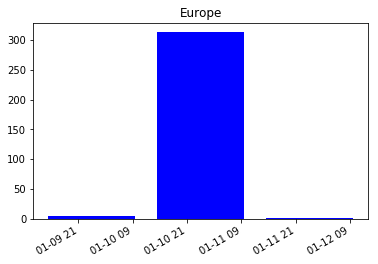

In [17]:
searchTerm = 'Europe'
startDate = '10 01 2011'
endDate = '12 01 2011'
dates, counts = searchContribs(searchTerm,startDate,endDate)
plotContribs(searchTerm, dates, counts)